In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage import img_as_float

# Principal Component Analysis for Image Compression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/10H5jboTpK8wuJcJbi84WVGKjoHOKlXsZ?usp=sharing)

In [7]:
# Load an image
image = imread('https://compote.slate.com/images/c1d35070-ce37-4d08-a068-612f7cccd751.jpeg?width=780&height=520&rect=1082x721&offset=125x0')
image = img_as_float(image)  # Convert to floating point

In [8]:
# Assuming the image is grayscale for simplicity; if not, convert it to grayscale
if len(image.shape) > 2:
    image = image.mean(axis=2)

In [9]:
# Reshape the image data into a 2D array
h, w = image.shape
image_reshaped = image.reshape(h, -1)

In [14]:
# Set number components
# You can adjust this for higher or lower compression
n_components = 50

In [15]:
# Apply PCA for compression
pca = PCA(n_components=n_components)
image_pca = pca.fit_transform(image_reshaped)

In [16]:
# Reconstruct the image from the compressed representation
image_reconstructed = pca.inverse_transform(image_pca)
image_reconstructed = image_reconstructed.reshape(h, w)

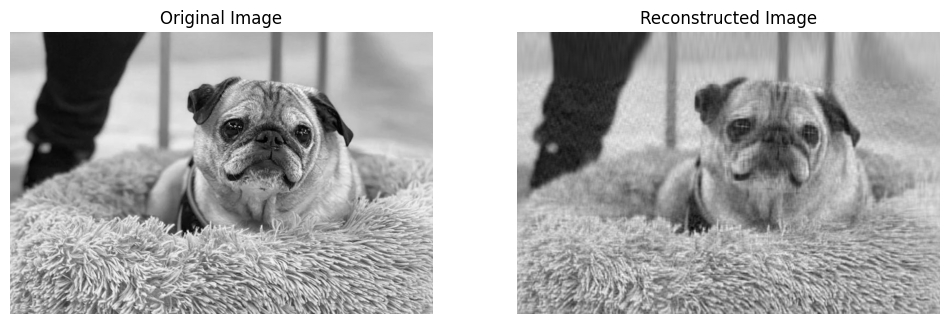

In [17]:
# Display original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_reconstructed, cmap='gray')
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()

## Checking compression levels

In [22]:
image_reshaped.shape

(520, 780)

In [24]:
image_pca.shape

(520, 50)

In [30]:
compression_rate = image_pca.shape[1]/image_reshaped.shape[1] * 100

In [32]:
100 - round(compression_rate, 2)

93.59

In [34]:
print(f'PCA compression rate of original image: {100 - round(compression_rate, 2)}%!!!')

PCA compression rate of original image: 93.59%!!!
